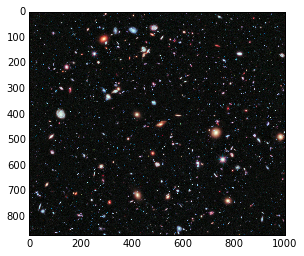

In [11]:
%matplotlib inline
from skimage import io, color,data,segmentation
import numpy as np

img = data.hubble_deep_field();
img_gray = color.rgb2gray(img)
io.imshow(img)

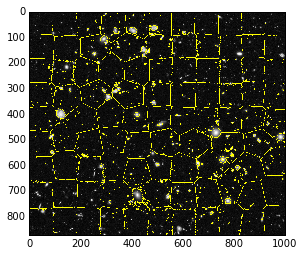

In [12]:
segment_map= segmentation.slic(img,compactness=30);
img_contours = segmentation.mark_boundaries(img_gray,segment_map)
io.imshow(img_contours)

In [4]:
def calc_statistics(img,segments):
    sup_brightness = [np.mean(img[segments==i]) for i in range(0,np.amax(segments)+1)]
    return sup_brightness
        
def look_at_brightest(superpixel_intensities, nr_select=3):
    thresh = sorted(superpixel_intensities)[-1*nr_select]
    return thresh

In [5]:
sup_intensities = calc_statistics(img_gray,segment_map);
sup_thresh = look_at_brightest(sup_intensities)    
sup_selected = [1 if s > sup_thresh else 0 for s in sup_intensities]

In [6]:
def process_finally(img,sup_selected,segments):
    newimg = np.array(img, copy=True)
    for s in range(0,np.amax(segments)+1):
        newimg[np.where(segments==s)] = sup_selected[s] * img[np.where(segments==s)]
        
    return newimg 

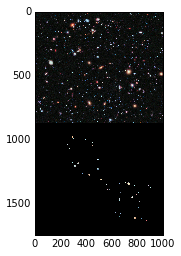

In [7]:
img_processed = process_finally(img, sup_selected, segment_map)
io.imshow(np.vstack((img,img_processed)))